In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")

#Dataset information
This dataset is composed of speech signals acquired from 42 people with early stage Parkinson's disease. The data collection was carried out during 6 months of telemonitoring in the patients' homes. Each row is one of 5875 voice recordings of the participants.


The columns contain information such as age, gender, UPDRS motor, UPDRS total and 16 columns with voice information.

The focus of this analysis will be on the Unified Parkinson's Disease Rating Scale (UPDRS), a comprehensive assessment tool encompassing multiple ratings that gauge mental functioning, behavior, mood, activities of daily living, and motor function. The primary objective is to establish a multi-linear regression model using these variables to characterize the continuous progression of the disease.

# Exploratory Analysis

In [ ]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

Todas las variables cuentan con valores numéricos, por lo que no hay que hacer ningún tipo de modificación obligatoria

In [ ]:
df.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

Este dataset no cuenta con valores nulos, lo que permite seguir adelante con el análisis sin problema

La variable objetivo será UPDRS scale

In [ ]:
print("Se cuenta con {} muestras".format(df.shape[0]))


There are 5875 samples


In [ ]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


El valor promedio de la variable objetivo se encuentra en 29.01, con una desviación de 8.12, un valor máximo de 39.5 y mínimo de 5.03, valores de referencia para la evaluación futura

In [ ]:
df.corr().style.background_gradient(cmap='YlGnBu')

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,0.120350,0.146202,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,0.010258,0.101554,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,0.076703,0.058736,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,-0.028876,-0.033870,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,0.072698,0.102349,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,0.064027,0.092141,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,0.844630,0.649046,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,1.000000,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


As observed in the preceding correlation table, the variable most strongly correlated with the variable of interest is motor_UPDRS, which specifically measures the motor aspect of UPDRS. Therefore, retaining this value could be a significant feature for estimating the total UPDRS of an individual.

Text(0, 0.5, 'total_UPDRS')

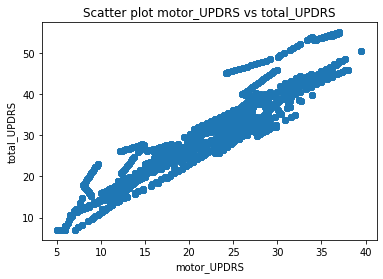

In [ ]:
plt.title("Scatter plot motor_UPDRS vs total_UPDRS")
plt.scatter(data=df,x='motor_UPDRS',y='total_UPDRS')
plt.xlabel('motor_UPDRS')
plt.ylabel('total_UPDRS')

The previous graph shows the strong correlation between these two variables.

# Distribution in different samples

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4cb8fc8d0>,
      dtype=object)

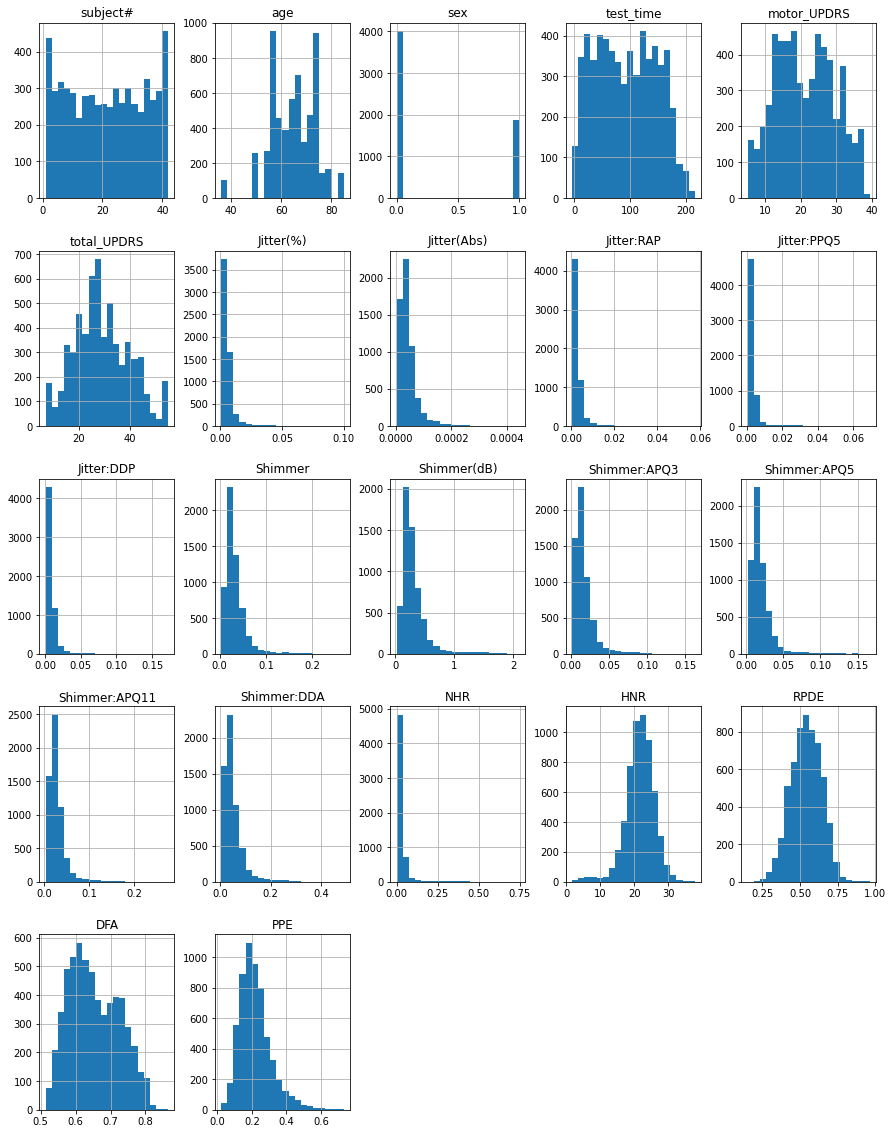

In [ ]:
#df.hist()
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax,bins=20)

From the distribution graphic we can conclude:
* The majority of the people present in the study are between 50 and 80 years of age.
* The target variable, total_UPDRS, has a majority concentration between the values 20 to 40.
* It should be taken into account that these values refer to the total number of samples, i.e. the same patient may have several samples, so that data such as age or sex are increased in this distribution graph.

Therefore, if you want to know the total number of men and women in the test, you must apply the following line of code (where 0 is male and 1 is female, according to the documentation of the dataset) :

In [ ]:
df.groupby('sex')['subject#'].nunique()

sex
0    28
1    14
Name: subject#, dtype: int64

# Data cleansing
For the implementation of the linear regression model, a column such as 'subject#' is not relevant, so it is removed from the dataframe. <br>

The 'test time' column will also be eliminated since no time series will be taken into account for this work, and all data will be considered as independent samples.

In [ ]:
df.drop(['subject#','test_time'],inplace=True,axis=1)

In [ ]:
df.head()

,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


# Regresión lineal múltiple

predictores y variable a predecir:

In [ ]:
x=df.drop(['total_UPDRS'],axis=1).to_numpy() #predictores
y=df['total_UPDRS'].to_numpy() #variable objetivo

In [ ]:
x

array([[72.     ,  0.     , 28.199  , ...,  0.41888,  0.54842,  0.16006],
       [72.     ,  0.     , 28.447  , ...,  0.43493,  0.56477,  0.1081 ],
       [72.     ,  0.     , 28.695  , ...,  0.46222,  0.54405,  0.21014],
       ...,
       [61.     ,  0.     , 21.495  , ...,  0.47792,  0.57888,  0.14157],
       [61.     ,  0.     , 21.007  , ...,  0.56865,  0.56327,  0.14204],
       [61.     ,  0.     , 20.513  , ...,  0.58608,  0.57077,  0.15336]])

In [ ]:
y

array([34.398, 34.894, 35.389, ..., 32.495, 32.007, 31.513])

## Normalization and splitting of data for training and test 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
norm_x=MinMaxScaler().fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(norm_x, y, test_size=0.2, random_state=0)

# Regresión e hiperparámetros

In [ ]:
#Hyperparameters

fit_intercept=[True,False]
positive=[True,False]


for i in range(len(fit_intercept)):
  for j in range(len(positive)):
    lin=LinearRegression(fit_intercept=fit_intercept[i],positive=positive[j]).fit(X_train,y_train)
    y_pred = lin.predict(X_test)
    print("Metrics behaviors with hyperparameters 'fit_intercept' in {} and 'positive' in {}".format(fit_intercept[i],positive[j]))
    print("Coefficient of determination (R-squared):",lin.score(norm_x,y))
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("")

Metrics behaviors with hyperparameters 'fit_intercept' set to True and 'positive' set to True
Coefficient of determination (R-squared): 0.9013780710576734
Mean Absolute Error (MAE): 2.451495750635847
Mean Squared Error (MSE): 11.325120102153495
Root Mean Squared Error (RMSE): 3.36528157843493

Metric behaviors with hyperparameters 'fit_intercept' set to True and 'positive' set to False
Coefficient of determination (R-squared): 0.9074483435384072
Mean Absolute Error (MAE): 2.44981056425408
Mean Squared Error (MSE): 10.867073176539261
Root Mean Squared Error (RMSE): 3.296524408606625

Metric behaviors with hyperparameters 'fit_intercept' set to False and 'positive' set to True
Coefficient of determination (R-squared): 0.9005262244228532
Mean Absolute Error (MAE): 2.466951725298192
Mean Squared Error (MSE): 11.478327994104374
Root Mean Squared Error (RMSE): 3.387968121766256

Metric behaviors with hyperparameters 'fit_intercept' set to False and 'positive' set to False
Coefficient of dete

# Conclusions based on the results and the problem

It is concluded that the best values for the studied regression metrics are with the hyperparameters 'fit_intercept' set to True, which allows to calculate the intercept for the model, and the hyperparameter 'positive' set to False, so as not to force the coefficients to be positive.
This gives an R2 of 0.9074483435384072, i.e., an acceptable linear fit of the model to the behavior of the target variable.

It is also important to highlight the value of an MAE of 2.44 and an RMSE of 3.29, metrics that measure the error and that vary according to the case study, so it would be necessary to consider with specialists whether these errors are acceptable in the problem posed here for the implementation of this model in a real case.

